In [1]:
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2023, 1, 1)
key = 'cz_RERrHJJff24j5EUUq'
# stockName = str(input())
stockName = 'IBM'

In [3]:
df = web.DataReader(stockName,'quandl', start, end, api_key=key)
stock = df[['Open','High','Low','Close','Volume','AdjClose']]

In [4]:
stock

,Open,High,Low,Close,Volume,AdjClose
Date,,,,,,
2018-03-27,153.95,154.8697,151.160,151.91,3810994.0,151.910000
2018-03-26,151.21,153.6570,150.280,153.37,4038586.0,153.370000
2018-03-23,152.25,152.5800,148.541,148.89,4389015.0,148.890000
2018-03-22,155.00,155.2499,152.000,152.09,4617371.0,152.090000
2018-03-21,156.57,158.2000,155.920,156.69,3240695.0,156.690000
...,...,...,...,...,...,...
2000-01-07,117.25,117.9400,110.620,113.50,11856700.0,83.320195
2000-01-06,118.00,118.9400,113.500,114.00,7971900.0,83.687245
2000-01-05,112.94,119.7500,112.120,116.00,12733200.0,85.155442


In [5]:
ma = stock['Close'].iloc[::-1]
ma.head()

Date
2000-01-03    116.00
2000-01-04    112.06
2000-01-05    116.00
2000-01-06    114.00
2000-01-07    113.50
Name: Close, dtype: float64

In [6]:
stock['MA50'] = ma.rolling(50).mean()
stock['MA200'] = ma.rolling(200).mean()

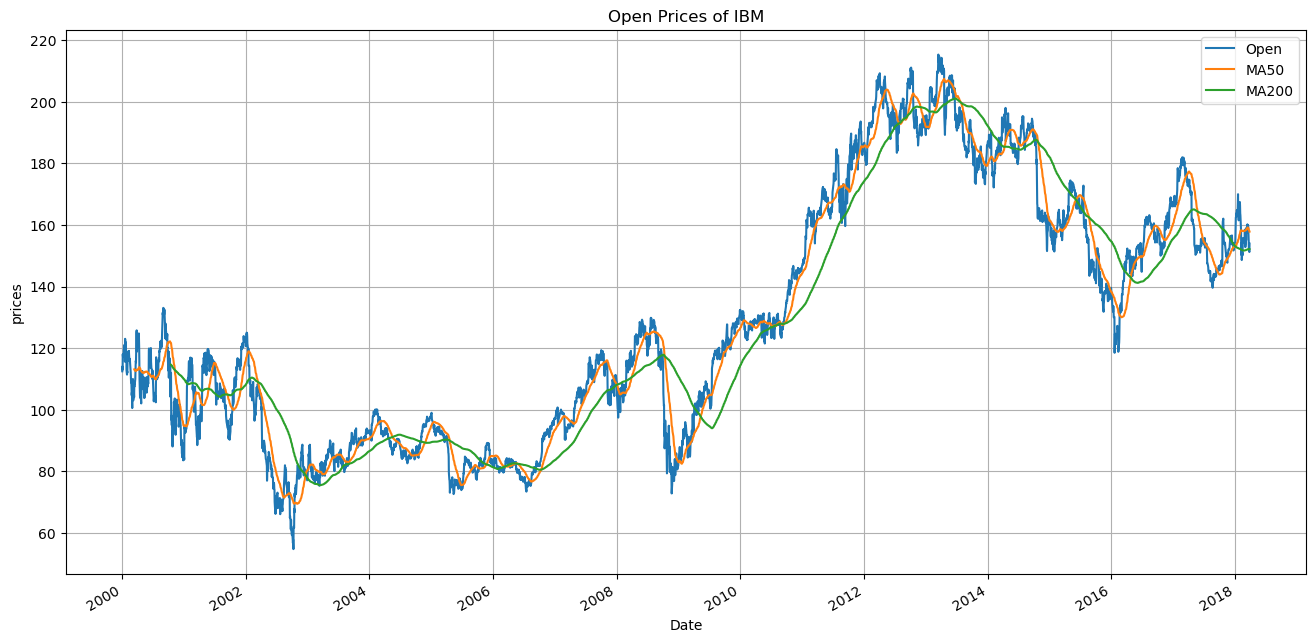

In [7]:
stock[['Open','MA50','MA200']].plot(figsize=(16,8));
plt.title("Open Prices of "+ stockName)
plt.xlabel("Date")
plt.ylabel("prices")
plt.grid()
plt.show()

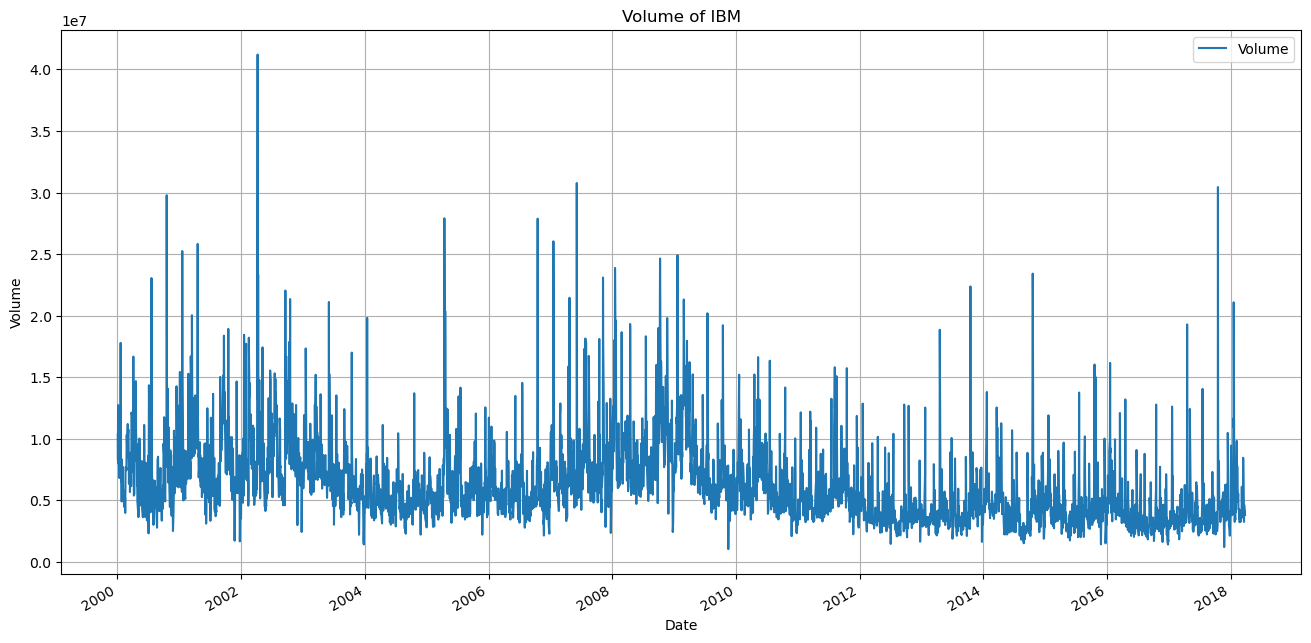

In [8]:
stock[['Volume']].plot(figsize=(16,8));
plt.title("Volume of " + stockName)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid()
plt.show()

In [9]:
stock['Volume'].idxmax()

Timestamp('2002-04-08 00:00:00')

In [10]:
stock.reset_index(inplace=True)

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4586 non-null   datetime64[ns]
 1   Open      4586 non-null   float64       
 2   High      4586 non-null   float64       
 3   Low       4586 non-null   float64       
 4   Close     4586 non-null   float64       
 5   Volume    4586 non-null   float64       
 6   AdjClose  4586 non-null   float64       
 7   MA50      4537 non-null   float64       
 8   MA200     4387 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 322.6 KB


In [12]:
fig = go.Figure(data=[go.Candlestick(x=stock['Date'],
                open=stock['Open'],
                high=stock['High'],
                low=stock['Low'],
                close=stock['Close'])])
fig.update_layout(
    title="CandleStick chart of " + stockName,
    xaxis_title="Date",
    yaxis_title="Prices")
fig.show()

In [13]:
stock.set_index('Date',inplace=True)

In [14]:
stock['price_t'] = stock['AdjClose']
stock['price_t-1'] = stock['price_t'].shift(1)
stock['daily_return'] = (stock['price_t'] / stock['price_t-1'])-1
stock

,Open,High,Low,Close,Volume,AdjClose,MA50,MA200,price_t,price_t-1,daily_return
Date,,,,,,,,,,,
2018-03-27,153.95,154.8697,151.160,151.91,3810994.0,151.910000,157.8430,152.15785,151.910000,NaN,NaN
2018-03-26,151.21,153.6570,150.280,153.37,4038586.0,153.370000,158.0676,152.15880,153.370000,151.910000,0.009611
2018-03-23,152.25,152.5800,148.541,148.89,4389015.0,148.890000,158.2842,152.14685,148.890000,153.370000,-0.029210
2018-03-22,155.00,155.2499,152.000,152.09,4617371.0,152.090000,158.5900,152.16425,152.090000,148.890000,0.021492
2018-03-21,156.57,158.2000,155.920,156.69,3240695.0,156.690000,158.8248,152.16585,156.690000,152.090000,0.030245
...,...,...,...,...,...,...,...,...,...,...,...
2000-01-07,117.25,117.9400,110.620,113.50,11856700.0,83.320195,NaN,NaN,83.320195,86.623639,-0.038136
2000-01-06,118.00,118.9400,113.500,114.00,7971900.0,83.687245,NaN,NaN,83.687245,83.320195,0.004405
2000-01-05,112.94,119.7500,112.120,116.00,12733200.0,85.155442,NaN,NaN,85.155442,83.687245,0.017544


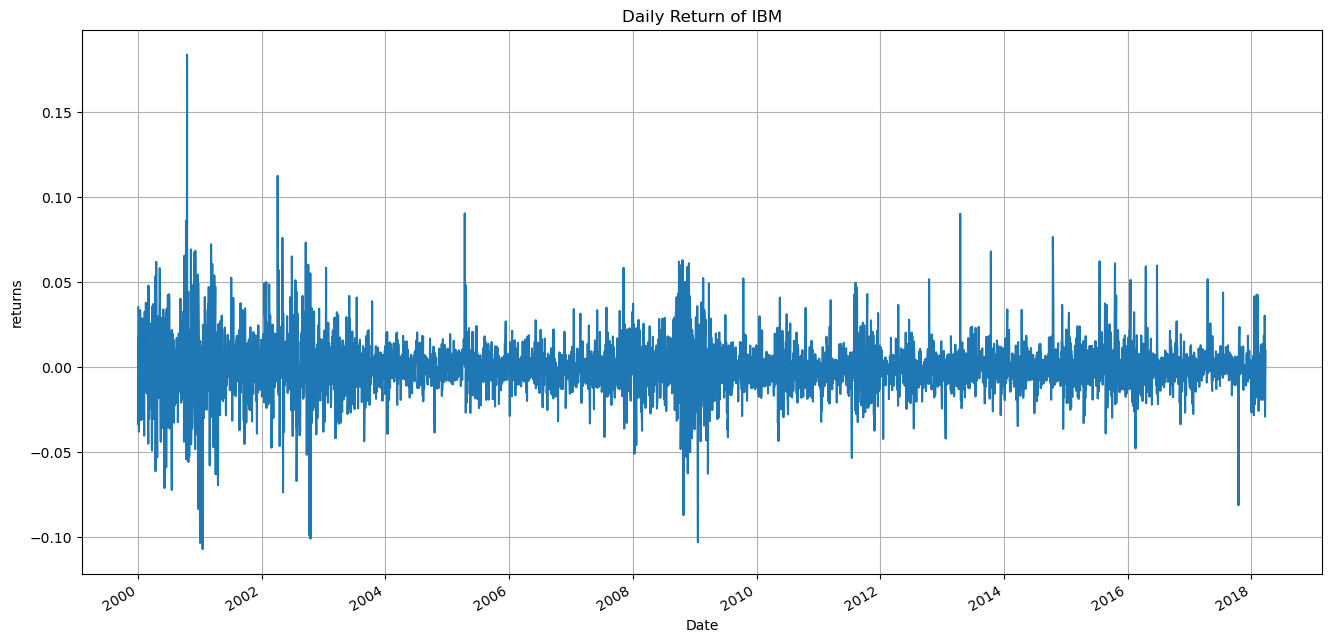

In [15]:
stock['daily_return'].plot(figsize = (16,8))
plt.title("Daily Return of "+ stockName)
plt.xlabel("Date")
plt.ylabel("returns")
plt.grid()
plt.show()

In [16]:
stock['daily_return'].idxmax()

Timestamp('2000-10-17 00:00:00')